In [20]:
import csv as csv
import pandas as pd
import numpy as np
from datetime import datetime
import re

In [2]:
df = pd.read_csv('citibike/data/201508-citibike-tripdata.csv', header=0)

In [4]:
original = datetime.today()
df['month'] = df['starttime'].apply(lambda a: int(re.search('(.)/', a).group(1)))
df['day'] = df['starttime'].apply(lambda a: int(re.search('/(.+)/', a).group(1)))
df['year'] = df['starttime'].apply(lambda a: int(re.search('/(\d{4})\s', a).group(1)))
df['hour'] = df['starttime'].apply(lambda a: int(re.search('\s(\d{2}):',a).group(1)))
df['minute'] = df['starttime'].apply(lambda a: int(re.search(':(\d{2}):',a).group(1)))
df['second'] = df['starttime'].apply(lambda a: int(re.search(':(\d{2})$',a).group(1)))

```SELECT * FROM df
WHERE hour > 18 AND hour < 7
LIMIT 100;```

```SELECT * FROM df
WHERE hour > 21 AND hour < 4
LIMIT 100;```

In [5]:
night = df[(df['hour']>18) | (df['hour']<7)]
late_night = df[(df['hour']>21) | (df['hour']<4)]

In [6]:
print night.head(100)

    tripduration          starttime           stoptime  start station id  \
0           1202  8/1/2015 00:00:04  8/1/2015 00:20:07               168   
1            301  8/1/2015 00:00:05  8/1/2015 00:05:06               450   
2            431  8/1/2015 00:00:06  8/1/2015 00:07:18               312   
3            273  8/1/2015 00:00:09  8/1/2015 00:04:43               382   
4           1256  8/1/2015 00:00:17  8/1/2015 00:21:13               352   
5            739  8/1/2015 00:00:24  8/1/2015 00:12:44               212   
6            433  8/1/2015 00:00:30  8/1/2015 00:07:43               388   
7           1575  8/1/2015 00:00:33  8/1/2015 00:26:49               492   
8            843  8/1/2015 00:00:39  8/1/2015 00:14:43               387   
9            467  8/1/2015 00:00:49  8/1/2015 00:08:37               285   
10          1540  8/1/2015 00:00:48  8/1/2015 00:26:29               492   
11          1593  8/1/2015 00:00:56  8/1/2015 00:27:29               492   
12          

In [7]:
print late_night.head()

   tripduration          starttime           stoptime  start station id  \
0          1202  8/1/2015 00:00:04  8/1/2015 00:20:07               168   
1           301  8/1/2015 00:00:05  8/1/2015 00:05:06               450   
2           431  8/1/2015 00:00:06  8/1/2015 00:07:18               312   
3           273  8/1/2015 00:00:09  8/1/2015 00:04:43               382   
4          1256  8/1/2015 00:00:17  8/1/2015 00:21:13               352   

        start station name  start station latitude  start station longitude  \
0          W 18 St & 6 Ave               40.739713               -73.994564   
1          W 49 St & 8 Ave               40.762272               -73.987882   
2  Allen St & E Houston St               40.722055               -73.989111   
3  University Pl & E 14 St               40.734927               -73.992005   
4          W 56 St & 6 Ave               40.763406               -73.977225   

   end station id      end station name  end station latitude   ...    bik

In [8]:
print df.describe()

         tripduration  start station id  start station latitude  \
count  1179044.000000    1179044.000000          1179044.000000   
mean      1017.478667        518.690223               40.734407   
std       7820.897735        547.230352                0.019571   
min         60.000000         72.000000               40.678907   
25%        415.000000        307.000000               40.720434   
50%        680.000000        417.000000               40.735877   
75%       1145.000000        496.000000               40.750020   
max    2842280.000000       3224.000000               40.771639   

       start station longitude  end station id  end station latitude  \
count           1179044.000000  1179044.000000        1179044.000000   
mean                -73.990754      517.945275             40.734110   
std                   0.013562      547.811466              0.019617   
min                 -74.017134       72.000000             40.678907   
25%                 -74.001497      

In [9]:
print night.describe()

         tripduration  start station id  start station latitude  \
count   292271.000000     292271.000000           292271.000000   
mean      1008.473567        514.127426               40.733731   
std      10829.340925        544.607868                0.018968   
min         60.000000         72.000000               40.678907   
25%        409.000000        307.000000               40.720664   
50%        669.000000        412.000000               40.734546   
75%       1102.000000        492.000000               40.747804   
max    2712082.000000       3224.000000               40.771639   

       start station longitude  end station id  end station latitude  \
count            292271.000000   292271.000000         292271.000000   
mean                -73.991125      518.934085             40.732797   
std                   0.013434      556.915097              0.019454   
min                 -74.017134       72.000000             40.678907   
25%                 -74.001497      

In [10]:
print late_night.describe()

         tripduration  start station id  start station latitude  \
count    77811.000000      77811.000000            77811.000000   
mean      1145.340325        515.932105               40.733015   
std      18422.226723        562.706097                0.018722   
min         60.000000         72.000000               40.679427   
25%        408.000000        304.000000               40.720874   
50%        673.000000        404.000000               40.732916   
75%       1102.000000        488.000000               40.746745   
max    2712082.000000       3224.000000               40.771639   

       start station longitude  end station id  end station latitude  \
count             77811.000000    77811.000000          77811.000000   
mean                -73.990618      531.657169             40.731919   
std                   0.013483      582.982519              0.019574   
min                 -74.017134       72.000000             40.678907   
25%                 -74.000040      

```SELECT * FROM df 
WHERE "birth year" IS NULL```

In [12]:
null_birth = df[df['birth year'].isnull()]
print null_birth

         tripduration           starttime            stoptime  \
7                1575   8/1/2015 00:00:33   8/1/2015 00:26:49   
8                 843   8/1/2015 00:00:39   8/1/2015 00:14:43   
10               1540   8/1/2015 00:00:48   8/1/2015 00:26:29   
11               1593   8/1/2015 00:00:56   8/1/2015 00:27:29   
25               2183   8/1/2015 00:02:10   8/1/2015 00:38:33   
26               2150   8/1/2015 00:02:19   8/1/2015 00:38:10   
34               1424   8/1/2015 00:03:36   8/1/2015 00:27:21   
40                793   8/1/2015 00:03:53   8/1/2015 00:17:07   
44               1397   8/1/2015 00:04:04   8/1/2015 00:27:22   
48               1464   8/1/2015 00:04:34   8/1/2015 00:28:58   
49               1367   8/1/2015 00:04:59   8/1/2015 00:27:46   
50               1316   8/1/2015 00:05:21   8/1/2015 00:27:17   
51               1316   8/1/2015 00:05:21   8/1/2015 00:27:17   
61               5573   8/1/2015 00:06:12   8/1/2015 01:39:05   
73               3657   8

```SELECT usertype, count(*) FROM df 
WHERE "birth year" IS NULL
GROUP BY usertype```

In [15]:
null_birth = df[df['birth year'].isnull()].groupby('usertype').size()
print null_birth

usertype
Customer      220996
Subscriber         5
dtype: int64


```SELECT * FROM df
WHERE "birth year" IS NULL AND usertype = 'Subscriber'```

In [19]:
null_birth_subscriber = df[(df['birth year'].isnull()) & (df['usertype'] == 'Subscriber')]
print null_birth_subscriber

        tripduration           starttime            stoptime  \
90077            454   8/3/2015 17:24:11   8/3/2015 17:31:46   
138689           410   8/4/2015 19:16:04   8/4/2015 19:22:54   
263214           503   8/7/2015 18:52:02   8/7/2015 19:00:26   
464355           630  8/13/2015 11:44:57  8/13/2015 11:55:28   
672999           238  8/18/2015 20:10:37  8/18/2015 20:14:36   

        start station id     start station name  start station latitude  \
90077                468     Broadway & W 55 St               40.765265   
138689               447        8 Ave & W 52 St               40.763707   
263214               447        8 Ave & W 52 St               40.763707   
464355               468     Broadway & W 55 St               40.765265   
672999               284  Greenwich Ave & 8 Ave               40.739017   

        start station longitude  end station id    end station name  \
90077                -73.981923             529     W 42 St & 8 Ave   
138689               -

```SELECT "birth year", AVG(tripduration), COUNT(*) FROM df
WHERE "birth year" IS NOT NULL
GROUP BY "birth year"```

In [27]:
age_duration = df[df['birth year'].notnull()].groupby(['birth year']).agg({'tripduration': np.mean , 'birth year': np.size})
age_duration['tripduration'] = age_duration['tripduration'].apply(lambda a: a / 60)
print age_duration
#HOW DO WE ALIAS COLUMN NAMES? HOW DO WE SET COLUMN ORDER WHEN USING A DICTIONARY?
#BIRTH YEAR IS A COUNT.

            birth year  tripduration
birth year                          
1885               100     14.820333
1899                24     16.311111
1900               154     20.519048
1901                22     14.593182
1907                10     10.173333
1910                28      9.137500
1913                13     23.576923
1917                 3     17.222222
1921                 1     38.866667
1925                12     12.948611
1926                10     12.883333
1930                 6     56.383333
1931                 2      8.058333
1932                75     10.345333
1934                10     13.970000
1935                53     13.442138
1936                72     14.847685
1937                77      9.726840
1938               146     20.561073
1939               123     15.397425
1940               583     14.993796
1941               595     11.938627
1942              1017     15.008276
1943               407     11.669328
1944               732     13.425023
1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109f62490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10a4f9310>]], dtype=object)

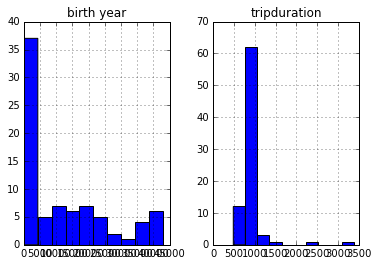

In [23]:
%matplotlib inline
age_duration.hist()